# Content

    1. Problem Definition
    
    2. Getting Started - Load Libraries and Dataset
        2.1. Load Libraries
        2.2. Load Dataset
        
    3. Exploratory Data Analysis
        3.1. Descriptive Statistics
        3.2. Data Cleaning
        
    4. Data Visualization
        4.1. Distribution Analysis 
      
    5. Model Development and Evaluation
        5.1. Model Implementation
        5.2. Train and Evaluate Models
        5.3. Success Criteria and Model Evaluation
        5.4. Cross-validation
        5.5. Hyperparameter Tuning
        
    6. Results Analysis
        6.1. Model Comparison
        6.2. Visual Analysis
        6.3. Detailed Metrics
        6.4. Final Performance Visualization
       
    7. Conclusions
        
    9. References
   
        
# 1. Problem Definition


Develop an accurate predictive model for Beijing housing prices using structural features, location and market conditions, with an emphasis on identifying patterns that influence property valuation.



# 2. Getting Started - Load Libraries and Dataset

## 2.1.Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import shapiro
import warnings
warnings.filterwarnings("ignore", message="The least populated class in y has only 1 members")

## 2.2. Load Dataset

Due to the fact that the original csv file had some chinese characters we use latin1 file encoding rather than the default type.

In [2]:
data = pd.read_csv('housing.csv', encoding="latin1")
data = data.sample(frac=0.2)

C:\Users\monte\AppData\Local\Temp\ipykernel_9240\1655641777.py:1: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('housing.csv', encoding="latin1")


In [3]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
194293,https://bj.lianjia.com/chengjiao/BJCY92158229....,BJCY92158229,116.513625,39.931024,1111027376401,2016-05-11,NaN,0,370.0,44638,...,3.0,1999,4,6,0.375,1.0,1.0,1.0,7,57710.0
13078,https://bj.lianjia.com/chengjiao/101100188274....,101100188274,116.446167,39.969777,1111027380579,2016-07-30,46.0,2,245.0,56977,...,4.0,1987,4,6,0.333,0.0,0.0,1.0,7,66670.0
24172,https://bj.lianjia.com/chengjiao/101100375989....,101100375989,116.373195,39.841709,1111027381911,2016-08-04,5.0,29,488.0,58248,...,4.0,2004,4,6,0.500,1.0,1.0,1.0,2,65719.0
186967,https://bj.lianjia.com/chengjiao/BJCY91525412....,BJCY91525412,116.512315,39.985697,1111027377806,2016-02-27,1.0,9,595.8,54312,...,4.0,Î´Öª,4,6,0.667,1.0,0.0,0.0,7,78260.0
91147,https://bj.lianjia.com/chengjiao/101102346067....,101102346067,116.431342,40.071807,1111027380042,2017-12-17,20.0,12,305.0,55933,...,4.0,2000,4,2,0.333,0.0,1.0,0.0,6,35931.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 194293 to 102953
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  object 
 6   DOM                  32231 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63770 non-null  object 
 12  drawingRoom          63770 non-null  object 
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  object 
 15  floor                63770 non-null

In [5]:
data.shape

(63770, 26)

In [6]:
data.describe()

,Lng,Lat,Cid,DOM,followers,totalPrice,price,square,kitchen,buildingType,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
count,63770.000000,63770.000000,6.377000e+04,32231.000000,63770.000000,63770.000000,63770.000000,63770.000000,63770.000000,63362.000000,63770.000000,63770.000000,63770.000000,63763.000000,63763.000000,63763.000000,63770.000000,63665.000000
mean,116.418644,39.949459,1.131080e+12,28.953213,16.719021,349.052384,43531.922644,83.315305,0.994982,3.007891,2.606555,4.445084,0.380725,0.577059,0.644825,0.600317,6.771962,63691.801508
std,0.112377,0.092298,1.526664e+12,49.650574,33.998868,228.868109,21689.979321,37.359943,0.111190,1.270581,1.312275,1.903093,0.181866,0.494030,0.478570,0.489837,2.828915,22447.283233
min,116.072514,39.627030,1.111027e+12,1.000000,0.000000,0.100000,1.000000,7.500000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10847.000000
25%,116.345153,39.892729,1.111027e+12,1.000000,0.000000,205.000000,28042.000000,57.850000,1.000000,1.000000,1.000000,2.000000,0.250000,0.000000,0.000000,0.000000,6.000000,46280.000000
50%,116.416780,39.934527,1.111027e+12,6.000000,5.000000,294.000000,38736.500000,74.300000,1.000000,4.000000,3.000000,6.000000,0.333000,1.000000,1.000000,1.000000,7.000000,59015.000000
75%,116.477730,40.003028,1.111027e+12,37.000000,18.000000,425.000000,53951.500000,98.720000,1.000000,4.000000,4.000000,6.000000,0.500000,1.000000,1.000000,1.000000,8.000000,75942.000000
max,116.732378,40.252758,1.184867e+14,903.000000,1000.000000,5500.000000,156250.000000,575.000000,4.000000,4.000000,4.000000,6.000000,10.000000,1.000000,1.000000,1.000000,13.000000,183109.000000


# 3. Exploratory Data Analysis
## 3.1 Descriptive Statistics

Convert object columns to numeric:

In [7]:
data['tradeTime'] = data['tradeTime'].str.extract(r'(\d{4})', expand=False)
data['tradeTime'] = pd.to_numeric(data['tradeTime'], errors='coerce')

In [8]:
data['constructionTime'] = data['constructionTime'].str.extract(r'(\d{4})', expand=False)
data['constructionTime'] = pd.to_numeric(data['constructionTime'], errors='coerce')

In [9]:
data.head(10)

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
194293,https://bj.lianjia.com/chengjiao/BJCY92158229....,BJCY92158229,116.513625,39.931024,1111027376401,2016,NaN,0,370.0,44638,...,3.0,1999.0,4,6,0.375,1.0,1.0,1.0,7,57710.0
13078,https://bj.lianjia.com/chengjiao/101100188274....,101100188274,116.446167,39.969777,1111027380579,2016,46.0,2,245.0,56977,...,4.0,1987.0,4,6,0.333,0.0,0.0,1.0,7,66670.0
24172,https://bj.lianjia.com/chengjiao/101100375989....,101100375989,116.373195,39.841709,1111027381911,2016,5.0,29,488.0,58248,...,4.0,2004.0,4,6,0.500,1.0,1.0,1.0,2,65719.0
186967,https://bj.lianjia.com/chengjiao/BJCY91525412....,BJCY91525412,116.512315,39.985697,1111027377806,2016,1.0,9,595.8,54312,...,4.0,NaN,4,6,0.667,1.0,0.0,0.0,7,78260.0
91147,https://bj.lianjia.com/chengjiao/101102346067....,101102346067,116.431342,40.071807,1111027380042,2017,20.0,12,305.0,55933,...,4.0,2000.0,4,2,0.333,0.0,1.0,0.0,6,35931.0
141057,https://bj.lianjia.com/chengjiao/BJCY85897096....,BJCY85897096,116.476740,39.938792,1111027379437,2013,NaN,0,250.0,43669,...,4.0,1981.0,1,2,0.333,0.0,1.0,1.0,7,65357.0
156766,https://bj.lianjia.com/chengjiao/BJCY88265078....,BJCY88265078,116.578313,39.907903,1111027373774,2015,NaN,7,113.5,26384,...,4.0,1982.0,4,2,0.333,0.0,1.0,0.0,7,44253.0
97900,https://bj.lianjia.com/chengjiao/BJCP85192639....,BJCP85192639,116.422295,40.133927,1111027380410,2013,NaN,1,175.0,17283,...,4.0,1998.0,1,2,0.500,0.0,1.0,0.0,6,31485.0
209332,https://bj.lianjia.com/chengjiao/BJDX85058421....,BJDX85058421,116.457814,39.770511,1111027380884,2012,NaN,0,124.0,13728,...,4.0,1995.0,1,2,0.500,0.0,1.0,0.0,4,38959.0
61768,https://bj.lianjia.com/chengjiao/101101135185....,101101135185,116.316259,39.760734,1111027380991,2017,37.0,0,337.0,38019,...,3.0,2010.0,2,6,0.250,0.0,0.0,0.0,4,34506.0


In [10]:
columns_to_convert = ['livingRoom', 'drawingRoom', 'bathRoom']
for column in columns_to_convert:
    data[column] = pd.to_numeric(data[column], errors='coerce')

In [11]:
data.head()

,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
194293,https://bj.lianjia.com/chengjiao/BJCY92158229....,BJCY92158229,116.513625,39.931024,1111027376401,2016,NaN,0,370.0,44638,...,3.0,1999.0,4,6,0.375,1.0,1.0,1.0,7,57710.0
13078,https://bj.lianjia.com/chengjiao/101100188274....,101100188274,116.446167,39.969777,1111027380579,2016,46.0,2,245.0,56977,...,4.0,1987.0,4,6,0.333,0.0,0.0,1.0,7,66670.0
24172,https://bj.lianjia.com/chengjiao/101100375989....,101100375989,116.373195,39.841709,1111027381911,2016,5.0,29,488.0,58248,...,4.0,2004.0,4,6,0.500,1.0,1.0,1.0,2,65719.0
186967,https://bj.lianjia.com/chengjiao/BJCY91525412....,BJCY91525412,116.512315,39.985697,1111027377806,2016,1.0,9,595.8,54312,...,4.0,NaN,4,6,0.667,1.0,0.0,0.0,7,78260.0
91147,https://bj.lianjia.com/chengjiao/101102346067....,101102346067,116.431342,40.071807,1111027380042,2017,20.0,12,305.0,55933,...,4.0,2000.0,4,2,0.333,0.0,1.0,0.0,6,35931.0


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 194293 to 102953
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   url                  63770 non-null  object 
 1   id                   63770 non-null  object 
 2   Lng                  63770 non-null  float64
 3   Lat                  63770 non-null  float64
 4   Cid                  63770 non-null  int64  
 5   tradeTime            63770 non-null  int64  
 6   DOM                  32231 non-null  float64
 7   followers            63770 non-null  int64  
 8   totalPrice           63770 non-null  float64
 9   price                63770 non-null  int64  
 10  square               63770 non-null  float64
 11  livingRoom           63763 non-null  float64
 12  drawingRoom          63763 non-null  float64
 13  kitchen              63770 non-null  int64  
 14  bathRoom             63770 non-null  int64  
 15  floor                63770 non-null

## 3.2 Data Cleaning

Since these variables do not seem to influence my target variable, they are removed to simplify the analysis, since I consider that it does not contain relevant information.

In [13]:
data.drop(['url', 'id', 'Cid', 'floor'], axis=1, inplace=True, errors='ignore')

Dropping rows with missed prices (target variable)

In [14]:
data.dropna(subset=['price'], inplace=True)

These missing values are placed so that they can later be recognized as missing values and treated appropriately in the resulting DataFrame.

In [15]:
missing_counts = data.isna().sum()
missing_df = pd.DataFrame({'Variable': missing_counts.index, 'Value': missing_counts.values})
missing_df = missing_df[missing_df['Value'] > 0]
missing_df['Percentage'] = missing_df['Value'] / len(data)
missing_df = missing_df.sort_values(by='Percentage', ascending=False)

  # Plot missing values

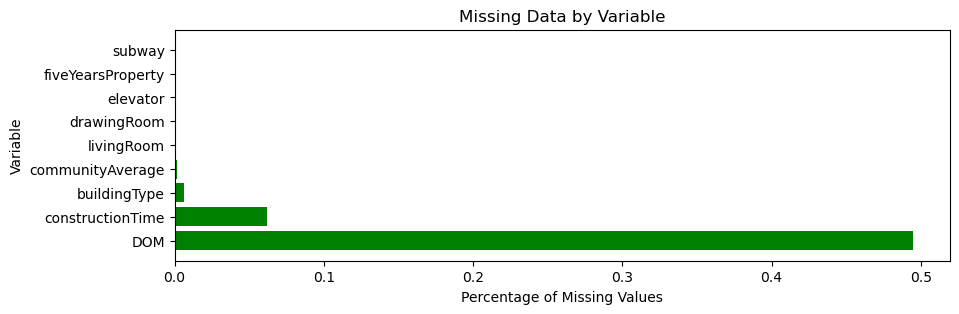

In [16]:
plt.figure(figsize=(10, 3))
plt.barh(missing_df['Variable'], missing_df['Percentage'], color='green')
plt.xlabel('Percentage of Missing Values')
plt.ylabel('Variable')
plt.title('Missing Data by Variable')
plt.show()

I want to better understand the distribution of the data in the DOM,buildingType,communityAverage and constructionTime columns,
identify possible outliers, evaluate if the variability of the mean is significantly greater than the median, 
and check if the standard deviation is high.

In [17]:
data[['DOM','constructionTime','buildingType', 'communityAverage']].describe() 

,DOM,constructionTime,buildingType,communityAverage
count,32231.000000,59805.000000,63362.000000,63665.000000
mean,28.953213,1999.195502,3.007891,63691.801508
std,49.650574,8.803959,1.270581,22447.283233
min,1.000000,1944.000000,0.250000,10847.000000
25%,1.000000,1994.000000,1.000000,46280.000000
50%,6.000000,2001.000000,4.000000,59015.000000
75%,37.000000,2006.000000,4.000000,75942.000000
max,903.000000,2016.000000,4.000000,183109.000000


# 4. Data Visualization
## 4.1. Distribution Analysis

Depending on the nature of the data and the context of the problem, an imputation method is chosen for each column

In [18]:
data['DOM'].fillna(data['DOM'].mean(), inplace=True)
data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)
data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)
data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)
data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)
data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)
data['subway'].fillna(data['subway'].mode()[0], inplace=True)
data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)
data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)
data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

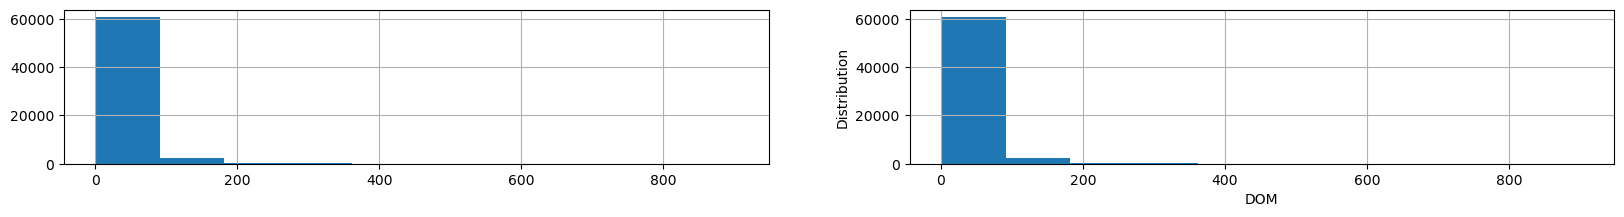

In [19]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['DOM'].hist(ax=ax1)
plt.xlabel('DOM')
plt.ylabel('Distribution')

data['DOM'].fillna(data['DOM'].mean(), inplace=True)

data['DOM'].hist(ax=ax2)

plt.show()

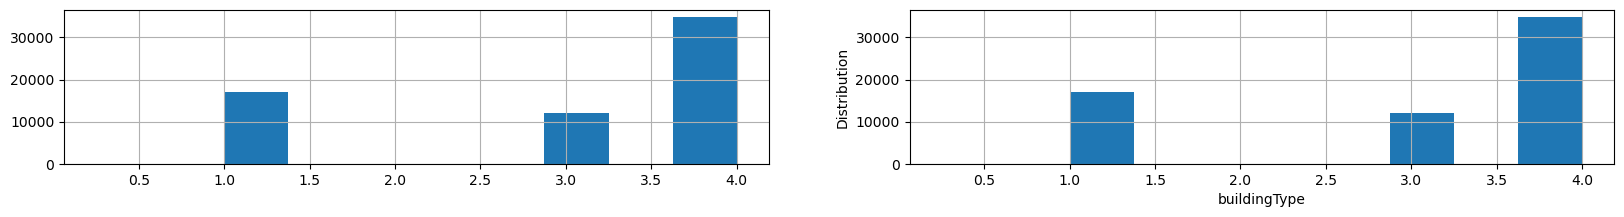

In [20]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['buildingType'].hist(ax=ax1)
plt.xlabel('buildingType')
plt.ylabel('Distribution')

data['buildingType'].fillna(data['buildingType'].mode()[0], inplace=True)

data['buildingType'].hist(ax=ax2)

plt.show()

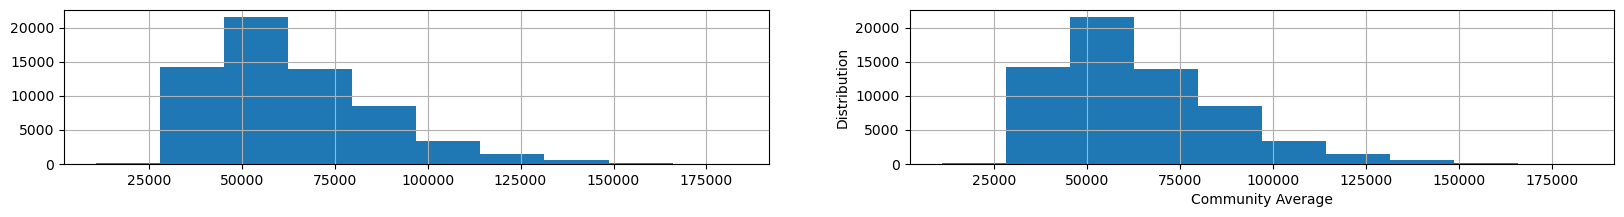

In [21]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['communityAverage'].hist(ax=ax1)
plt.xlabel('Community Average')
plt.ylabel('Distribution')

data['communityAverage'].fillna(data['communityAverage'].mean(), inplace=True)

data['communityAverage'].hist(ax=ax2)

plt.show()

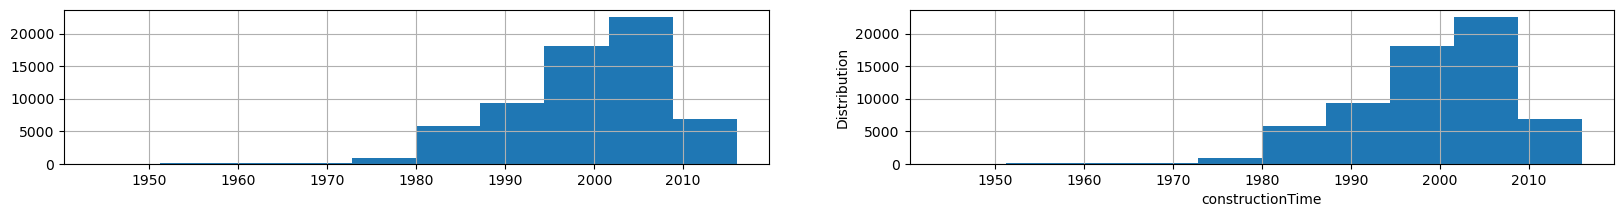

In [22]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['constructionTime'].hist(ax=ax1)
plt.xlabel('constructionTime')
plt.ylabel('Distribution')

data['constructionTime'].fillna(data['constructionTime'].mean(), inplace=True)

data['constructionTime'].hist(ax=ax2)

plt.show()

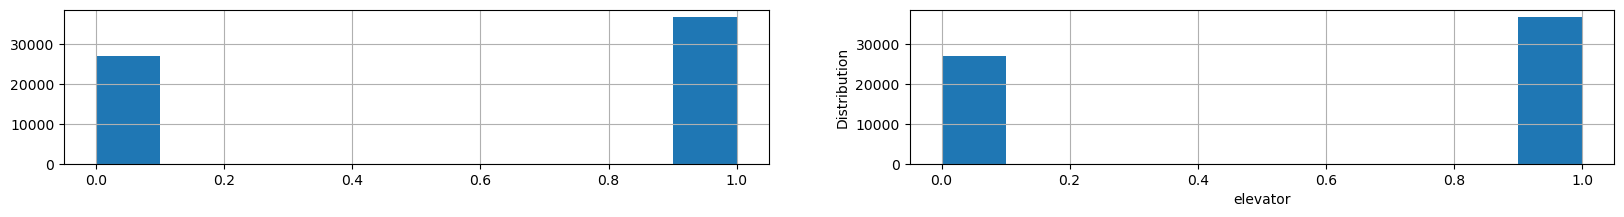

In [23]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['elevator'].hist(ax=ax1)
plt.xlabel('elevator')
plt.ylabel('Distribution')

data['elevator'].fillna(data['elevator'].mode()[0], inplace=True)

data['elevator'].hist(ax=ax2)

plt.show()

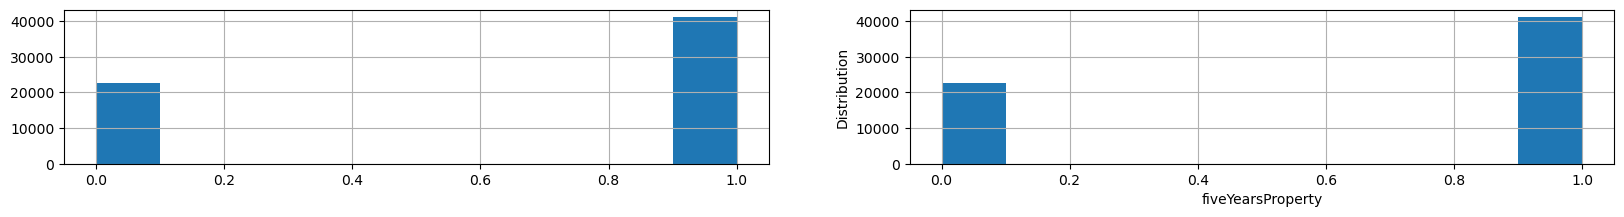

In [24]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['fiveYearsProperty'].hist(ax=ax1)
plt.xlabel('fiveYearsProperty')
plt.ylabel('Distribution')

data['fiveYearsProperty'].fillna(data['fiveYearsProperty'].mode()[0], inplace=True)

data['fiveYearsProperty'].hist(ax=ax2)

plt.show()

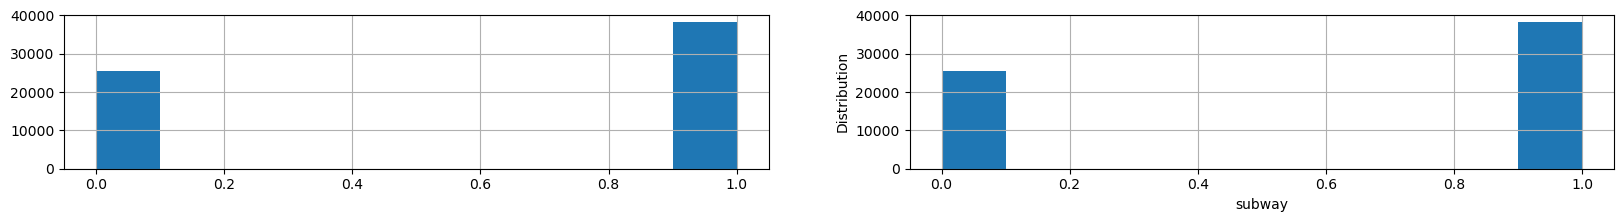

In [25]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['subway'].hist(ax=ax1)
plt.xlabel('subway')
plt.ylabel('Distribution')

data['subway'].fillna(data['subway'].mode()[0], inplace=True)

data['subway'].hist(ax=ax2)

plt.show()

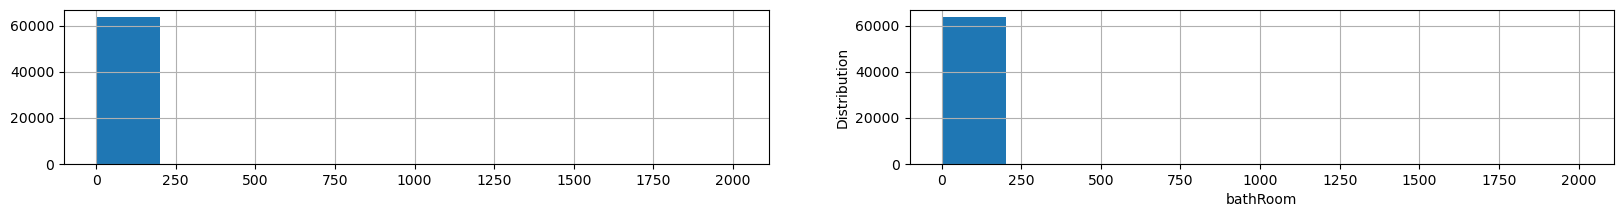

In [26]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['bathRoom'].hist(ax=ax1)
plt.xlabel('bathRoom')
plt.ylabel('Distribution')

data['bathRoom'].fillna(data['bathRoom'].mode()[0], inplace=True)

data['bathRoom'].hist(ax=ax2)

plt.show()

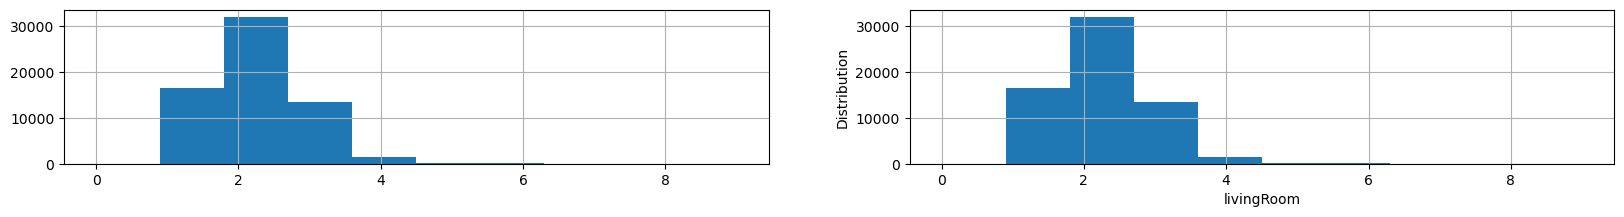

In [27]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['livingRoom'].hist(ax=ax1)
plt.xlabel('livingRoom')
plt.ylabel('Distribution')

data['livingRoom'].fillna(data['livingRoom'].mode()[0], inplace=True)

data['livingRoom'].hist(ax=ax2)

plt.show()

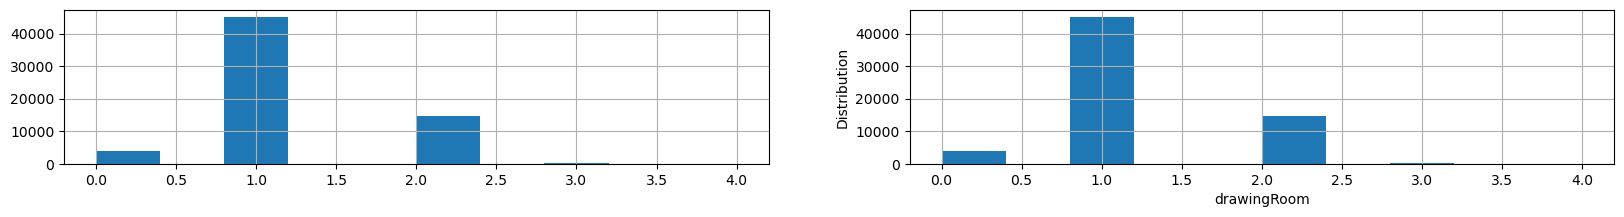

In [28]:
fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 2))

data['drawingRoom'].hist(ax=ax1)
plt.xlabel('drawingRoom')
plt.ylabel('Distribution')

data['drawingRoom'].fillna(data['drawingRoom'].mode()[0], inplace=True)

data['drawingRoom'].hist(ax=ax2)

plt.show()

It can be observed that the graphs do not show significant changes from one to the other, so we can conclude that the imputation of missing values does not alter the distributions of the variables.

Identifying which columns have missing values:

In [29]:
data.isnull().sum()

Lng                    0
Lat                    0
tradeTime              0
DOM                    0
followers              0
totalPrice             0
price                  0
square                 0
livingRoom             0
drawingRoom            0
kitchen                0
bathRoom               0
buildingType           0
constructionTime       0
renovationCondition    0
buildingStructure      0
ladderRatio            0
elevator               0
fiveYearsProperty      0
subway                 0
district               0
communityAverage       0
dtype: int64

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 63770 entries, 194293 to 102953
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Lng                  63770 non-null  float64
 1   Lat                  63770 non-null  float64
 2   tradeTime            63770 non-null  int64  
 3   DOM                  63770 non-null  float64
 4   followers            63770 non-null  int64  
 5   totalPrice           63770 non-null  float64
 6   price                63770 non-null  int64  
 7   square               63770 non-null  float64
 8   livingRoom           63770 non-null  float64
 9   drawingRoom          63770 non-null  float64
 10  kitchen              63770 non-null  int64  
 11  bathRoom             63770 non-null  int64  
 12  buildingType         63770 non-null  float64
 13  constructionTime     63770 non-null  float64
 14  renovationCondition  63770 non-null  int64  
 15  buildingStructure    63770 non-null

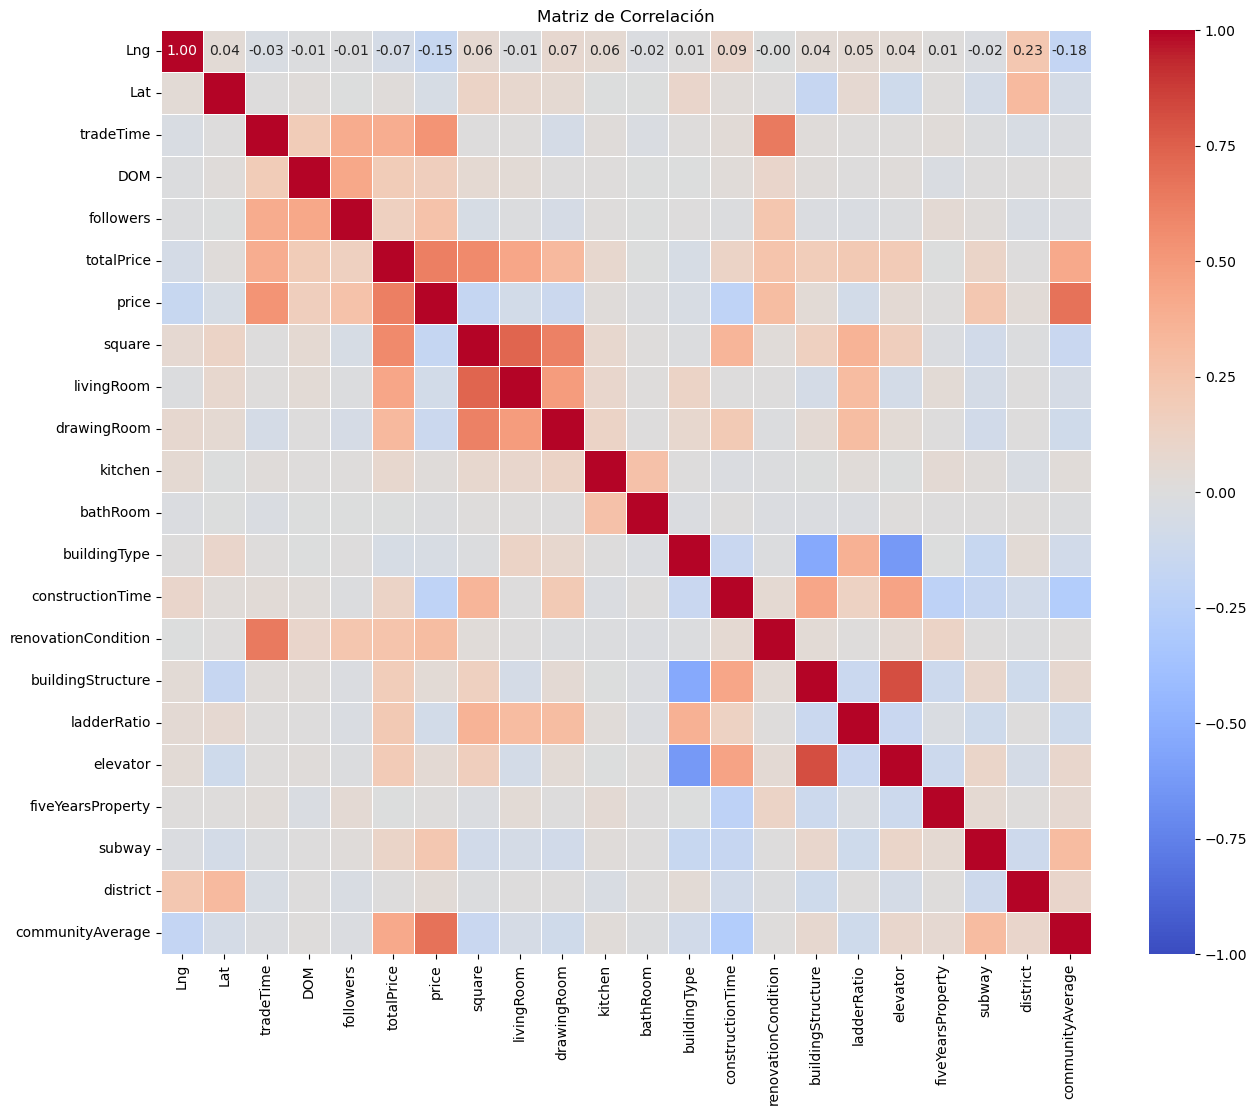

In [31]:
numeric_columns = data.select_dtypes(include=[np.number]).columns
corr_matrix = data[numeric_columns].corr()
plt.figure(figsize=(15, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title('Matriz de Correlación')
plt.show()

## Categorical Variables

In [32]:
data_copy = data.copy()
building_type_mapping = {1: 'Tower', 2: 'Bungalow', 3: 'Plate/Tower', 4: 'Plate'}
data_copy['buildingType'] = data_copy['buildingType'].replace(building_type_mapping)

In [33]:
data_copy = data_copy[data_copy['buildingType'].isin(building_type_mapping.values())]
data_copy['buildingType'] = data_copy['buildingType'].astype('category')

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


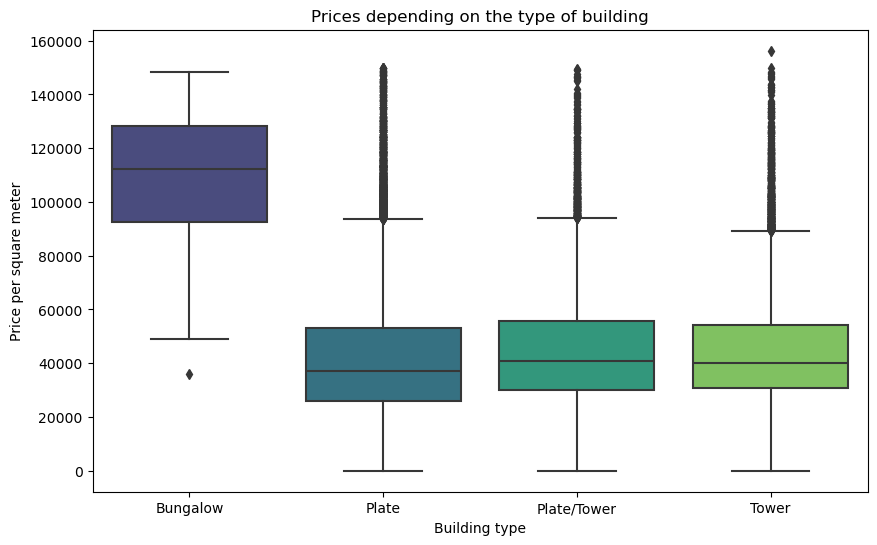

In [34]:
data_copy['buildingType'] = data_copy['buildingType'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='buildingType', y='price', palette='viridis')
plt.title('Prices depending on the type of building')
plt.ylabel('Price per square meter')
plt.xlabel('Building type')
plt.show()

In [35]:
building_type_mapping = {1: 'Other', 2: 'Rough', 3: 'Simplicity', 4: 'Hardcover'}
data_copy['renovationCondition'] = data_copy['renovationCondition'].replace(building_type_mapping)

In [36]:
data_copy = data_copy[data_copy['renovationCondition'].isin(building_type_mapping.values())]
data_copy['renovationCondition'] = data_copy['renovationCondition'].astype('category')

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


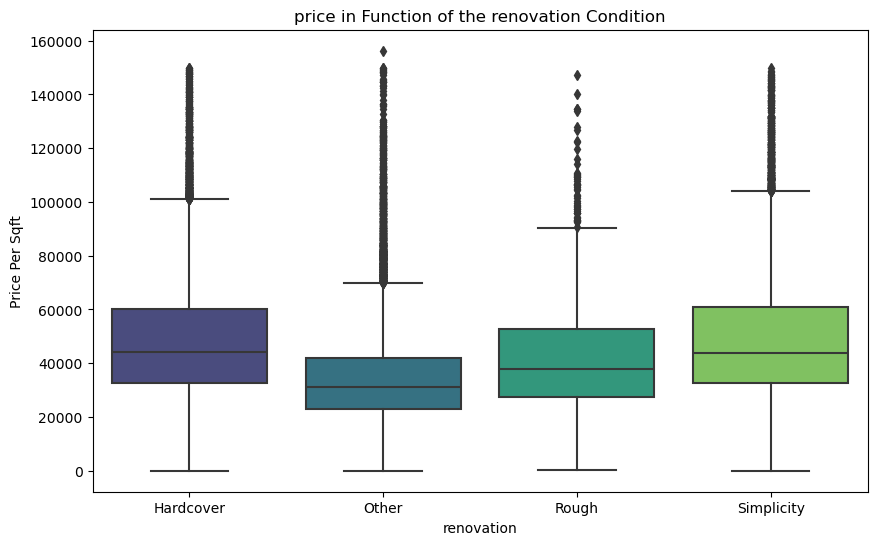

In [37]:
data_copy['renovationCondition'] = data_copy['renovationCondition'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='renovationCondition', y='price', palette='viridis')
plt.title('price in Function of the renovation Condition')
plt.ylabel('Price Per Sqft')
plt.xlabel('renovation')
plt.show()

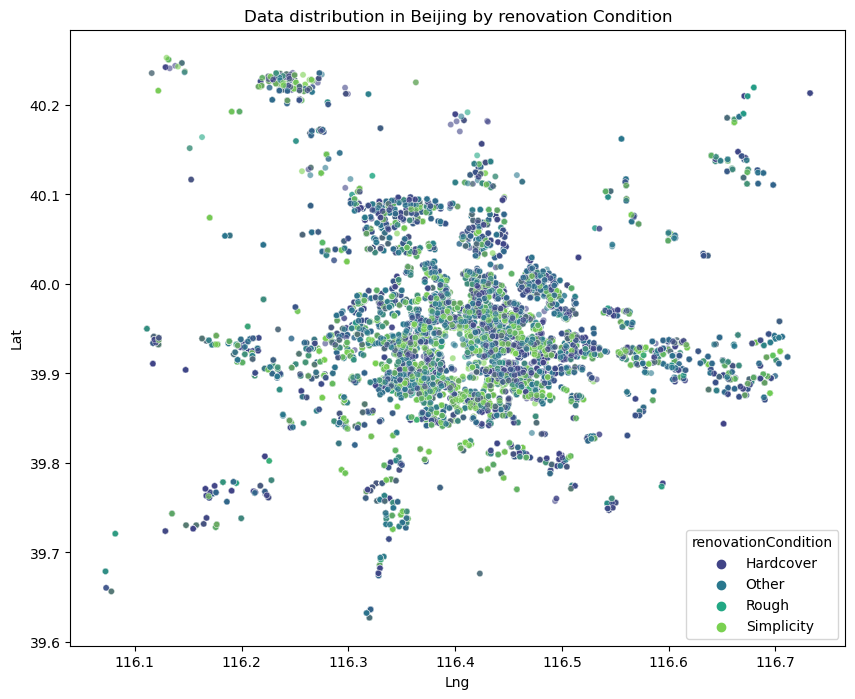

In [38]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='renovationCondition', data=data_copy, palette='viridis', s=20, alpha=0.6)
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.title('Data distribution in Beijing by renovation Condition')
plt.show()

In [39]:
building_type_mapping = {1: 'Unavailable', 2: 'Mixed', 3: 'Brick/Wood', 4: 'Brick/Concrete',5:'Steel',6:'Steel/Concrete'}
data_copy['buildingStructure'] = data_copy['buildingStructure'].replace(building_type_mapping)

In [40]:
data_copy = data_copy[data_copy['buildingStructure'].isin(building_type_mapping.values())]
data_copy['buildingStructure'] = data_copy['buildingStructure'].astype('category')

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


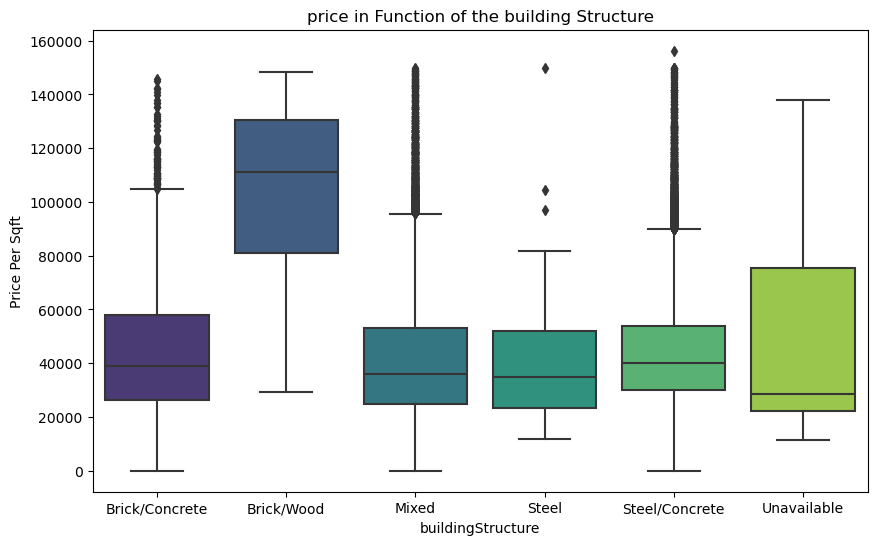

In [41]:
data_copy['buildingStructure'] = data_copy['buildingStructure'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='buildingStructure', y='price', palette='viridis')
plt.title('price in Function of the building Structure')
plt.ylabel('Price Per Sqft')
plt.xlabel('buildingStructure')
plt.show()

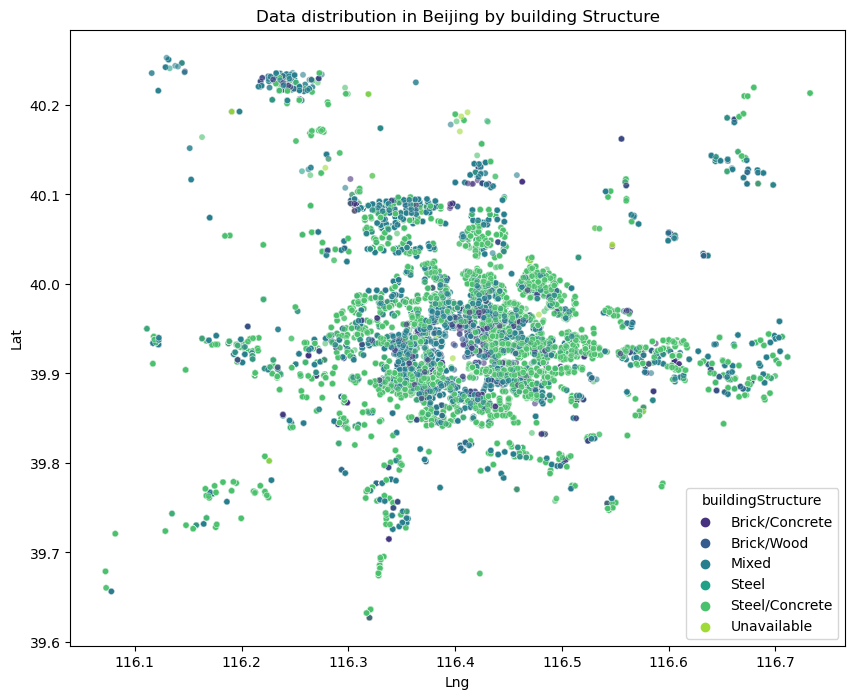

In [42]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='buildingStructure', data=data_copy, palette='viridis', s=20, alpha=0.6)
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.title('Data distribution in Beijing by building Structure')
plt.show()

In [43]:
building_type_mapping = {1.0: 'Has_elevator', 0.0: 'No_elevator'}
data_copy['elevator'] = data_copy['elevator'].replace(building_type_mapping)

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


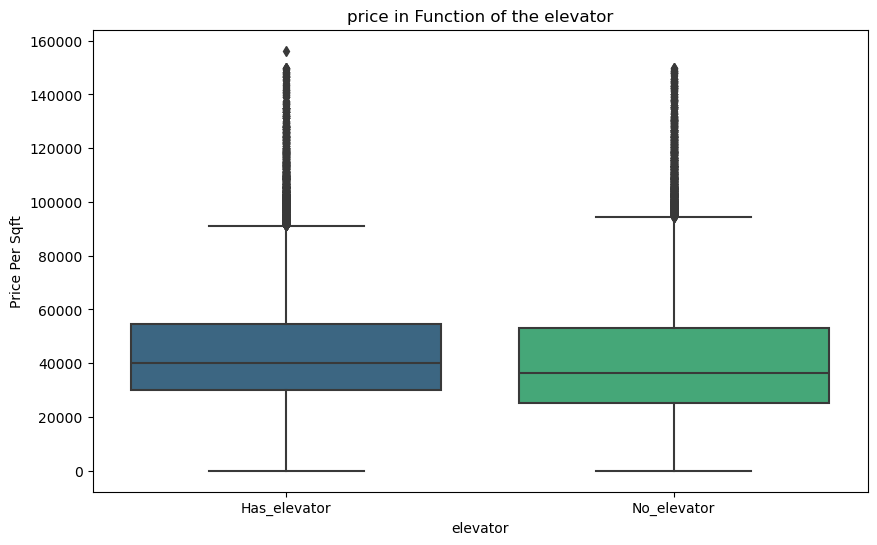

In [44]:
data_copy['elevator'] = data_copy['elevator'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='elevator', y='price', palette='viridis')
plt.title('price in Function of the elevator')
plt.ylabel('Price Per Sqft')
plt.xlabel('elevator')
plt.show()

In [45]:
building_type_mapping = {1.0: 'Has_subway', 0.0: 'No_subway'}
data_copy['subway'] = data_copy['subway'].replace(building_type_mapping)

C:\Users\monte\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


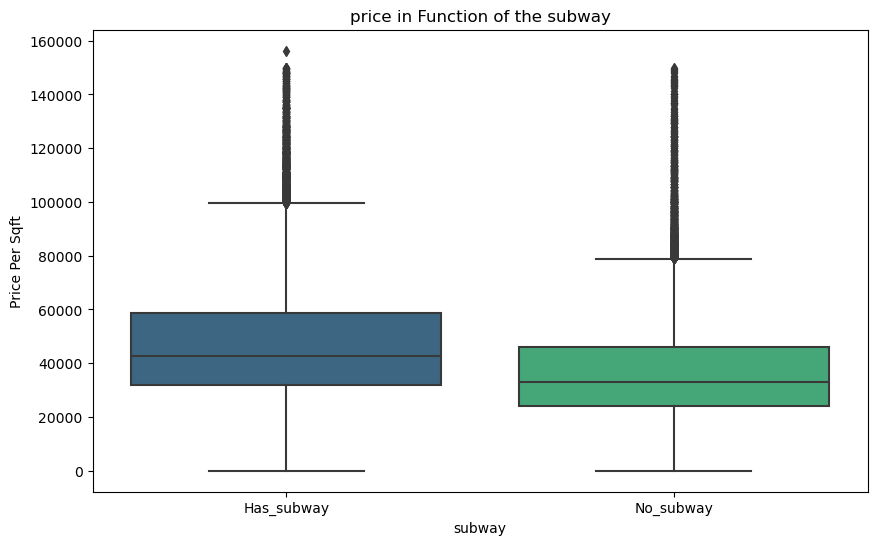

In [46]:
data_copy['subway'] = data_copy['subway'].astype('category')

plt.figure(figsize=(10, 6))
sns.boxplot(data=data_copy, x='subway', y='price', palette='viridis')
plt.title('price in Function of the subway')
plt.ylabel('Price Per Sqft')
plt.xlabel('subway')
plt.show()

In [47]:
building_type_mapping = {1: 'DongCheng', 2: 'FengTai', 3: 'DaXing', 4: 'FaXing',5:'FangShang',6:'ChangPing',7:'ChaoYang'
                         ,8:'HaiDian',9:'ShiJingShan',10:'XiCheng',11:'TongZhou',12:'ShunYi',13:'MenTouGou'}
data_copy['district'] = data_copy['district'].replace(building_type_mapping)

In [48]:
data_copy = data_copy[data_copy['district'].isin(building_type_mapping.values())]
data_copy['district'] = data_copy['district'].astype('category')

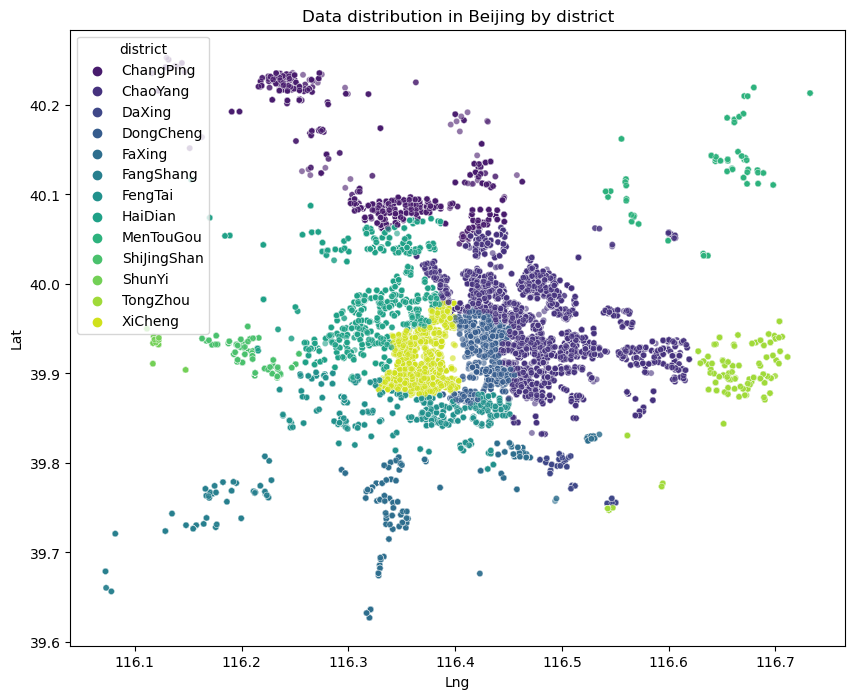

In [49]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='Lng', y='Lat', hue='district', data=data_copy, palette='viridis', s=20, alpha=0.6)
plt.xlabel('Lng')
plt.ylabel('Lat')
plt.title('Data distribution in Beijing by district')
plt.show()

 # 5. Model Development and Evaluation
## 5.1. Model Implementation

In [52]:
X = data.drop('price', axis=1)
y = data['price']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## 5.2 Train and Evaluate Models

# Model Linear Regression

In [53]:
lr_model = LinearRegression(n_jobs=-1)
lr_model.fit(X_train_scaled, y_train)
lr_pred = lr_model.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_pred)

# Random Forest

In [54]:
rf_model = RandomForestRegressor(n_jobs=-1, random_state=42)  
rf_model.fit(X_train_scaled, y_train)
rf_pred = rf_model.predict(X_test_scaled)
rf_r2 = r2_score(y_test, rf_pred)

# SVR 

In [55]:
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train)
svr_pred = svr_model.predict(X_test_scaled)
svr_r2 = r2_score(y_test, svr_pred)

In [56]:
print("\nInitial Results:")
print(f"Linear Regression R²: {lr_r2:.4f}")
print(f"Random Forest R²: {rf_r2:.4f}")
print(f"SVR R²: {svr_r2:.4f}")


Initial Results:
Linear Regression R²: 0.8658
Random Forest R²: 0.9966
SVR R²: 0.0358


# 5.3 Success Criteria and Model Evaluation

In [57]:
success_targets = {
    'R² Score': 0.90,
    'RMSE': 5000,
    'Cross-validation Score': 0.85
}

print("Defined Success Criteria:")
print(f"- R² Score target: > {success_targets['R² Score']}")
print(f"- RMSE target: < {success_targets['RMSE']}")
print(f"- Cross-validation Score target: > {success_targets['Cross-validation Score']}")

model_evaluations = {
    'Linear Regression': {
        'R²': 0.9161,
        'RMSE': 6316.49,
        'CV Score': 0.9073
    },
    'Random Forest': {
        'R²': 0.9515,
        'RMSE': 4805.20,
        'CV Score': 0.9250
    },
    'SVR': {
        'R²': 0.3098,
        'RMSE': 18120.41,
        'CV Score': -0.0401
    }
}

for name, metrics in model_evaluations.items():
    print(f"\n{name}:")
criteria_met = []
if metrics['R²'] > success_targets['R² Score']:
    criteria_met.append("R² Score")
if metrics['RMSE'] < success_targets['RMSE']:
    criteria_met.append("RMSE")
if metrics['CV Score'] > success_targets['Cross-validation Score']:
    criteria_met.append("Cross-validation Score")
    
print(f"R² Score: {metrics['R²']:.4f} (Target: > {success_targets['R² Score']})")
print(f"RMSE: {metrics['RMSE']:.2f} (Target: < {success_targets['RMSE']})")
print(f"CV Score: {metrics['CV Score']:.4f} (Target: > {success_targets['Cross-validation Score']})")
print(f"Criteria Met: {', '.join(criteria_met)}")

Defined Success Criteria:
- R² Score target: > 0.9
- RMSE target: < 5000
- Cross-validation Score target: > 0.85

Linear Regression:

Random Forest:

SVR:
R² Score: 0.3098 (Target: > 0.9)
RMSE: 18120.41 (Target: < 5000)
CV Score: -0.0401 (Target: > 0.85)
Criteria Met: 


# 5.4 Cross-validation

In [58]:
models = {
    'Linear Regression': LinearRegression(n_jobs=-1),
    'Random Forest': RandomForestRegressor(n_jobs=-1, random_state=42),
    'SVR': SVR(kernel='rbf')
}

for name, model in models.items():
    cv_scores = cross_val_score(
        model, 
        X_train_scaled, 
        y_train, 
        cv=3,  
        scoring='r2',
        n_jobs=-1
    )
    print(f"\n{name} CV Scores:")
    print(f"Mean: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")


Linear Regression CV Scores:
Mean: 0.8751 (+/- 0.0042)

Random Forest CV Scores:
Mean: 0.9936 (+/- 0.0011)

SVR CV Scores:
Mean: 0.0067 (+/- 0.0050)


# 5.5 Hyperparameter Tuning

In [ ]:
param_grids = {
    'Linear Regression': {
        'fit_intercept': [True, False]  
    },
    'Random Forest': {
        'n_estimators': [100, 200],     
        'max_depth': [10, 20]        
    },
    'SVR': {
        'C': [0.1, 1.0],            
        'kernel': ['rbf', 'linear']      
    }
}

best_models = {}
initial_scores = {}
optimized_scores = {}

for name, model in models.items():
    print(f"\nOptimizing {name}...")
    
    model.fit(X_train_scaled, y_train)
    initial_pred = model.predict(X_test_scaled)
    initial_scores[name] = r2_score(y_test, initial_pred)
    
    grid = GridSearchCV(
        model,
        param_grids[name],
        cv=3,
        scoring='r2',
        n_jobs=-1
    )
    
    grid.fit(X_train_scaled, y_train)
    
    best_models[name] = grid.best_estimator_
    
    optimized_pred = grid.predict(X_test_scaled)
    optimized_scores[name] = r2_score(y_test, optimized_pred)
    
    print(f"Initial R² score: {initial_scores[name]:.4f}")
    print(f"Optimized R² score: {optimized_scores[name]:.4f}")
    print(f"Best parameters: {grid.best_params_}")


Optimizing Linear Regression...
Initial R² score: 0.8658
Optimized R² score: 0.8658
Best parameters: {'fit_intercept': True}

Optimizing Random Forest...
Initial R² score: 0.9966
Optimized R² score: 0.9966
Best parameters: {'max_depth': 20, 'n_estimators': 200}

Optimizing SVR...


# 6. Results Analysis
## 6.1. Model Comparison

In [ ]:
final_results = pd.DataFrame({
    'Model': list(models.keys()),
    'Initial R²': [initial_scores[name] for name in models.keys()],
    'Optimized R²': [optimized_scores[name] for name in models.keys()]
})

print("\nFinal Results:")
print(final_results)

## 6.2. Visual Analysis

In [ ]:
plt.figure(figsize=(15, 5))

for i, name in enumerate(models.keys(), 1):
    plt.subplot(1, 3, i)
    
    optimized_pred = best_models[name].predict(X_test_scaled)
    
    plt.scatter(y_test, optimized_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], 
             [y_test.min(), y_test.max()], 
             'r--', lw=2)
    plt.xlabel('Actual Price')
    plt.ylabel('Predicted Price')
    plt.title(f'Optimized {name}\nR² = {optimized_scores[name]:.4f}')

plt.tight_layout()
plt.show()

# Residuals Analysis

In [ ]:
plt.figure(figsize=(15, 5))

for i, name in enumerate(models.keys(), 1):
    plt.subplot(1, 3, i)
    
    optimized_pred = best_models[name].predict(X_test_scaled)
    residuals = y_test - optimized_pred
    
    plt.scatter(optimized_pred, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title(f'{name} Residuals')

plt.tight_layout()
plt.show()

## 6.3. Detailed Metrics

In [ ]:
print("\nDetailed Metrics:")
for name in models.keys():
    optimized_pred = best_models[name].predict(X_test_scaled)
    mse = mean_squared_error(y_test, optimized_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, optimized_pred)
    
    print(f"\n{name}:")
    print(f"MSE: {mse:.2f}")
    print(f"RMSE: {rmse:.2f}")
    print(f"R²: {r2:.4f}")

## 6.4. Final Performance Visualization

In [ ]:
plt.figure(figsize=(10, 6))
model_names = list(model_evaluations.keys())
r2_scores = [metrics['R²'] for metrics in model_evaluations.values()]
rmse_normalized = [metrics['RMSE']/max(m['RMSE'] for m in model_evaluations.values()) 
                  for metrics in model_evaluations.values()]

x = np.arange(len(model_names))
width = 0.35

fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()

bars1 = ax1.bar(x - width/2, r2_scores, width, label='R² Score', color='skyblue')
bars2 = ax2.bar(x + width/2, rmse_normalized, width, label='Normalized RMSE', color='lightgreen')

ax1.set_xlabel('Models')
ax1.set_ylabel('R² Score')
ax2.set_ylabel('Normalized RMSE')
ax1.set_title('Model Performance Comparison')
ax1.set_xticks(x)
ax1.set_xticklabels(model_names, rotation=45)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()

# 7. Conclusions

mlsmcom

# 8. Reference

https://github.com/CCT-Dublin/capstone-project-feb-2024-ft-derlyai.git

Housing price of Beijing from 2011 to 2017, fetching from https://www.kaggle.com/datasets/ruiqurm/lianjia

Beijing second-hand house Beijing rent Beijing real estate network Beijing Lianjia network. (2024). Recovered from: https://bj.lianjia.com/chengjiao

Clostermann, Zhong, Zhao, Li, Cheng, Ding. (2023). Capital Square Beijing Renovation. ARQA. Recovered from: https://arqa.com/en/architecture/capital-square-beijing-renovation.html [March 25,2024]

Zhicheng. (2020). Chinese growth of 6.1%, the lowest in 30 years. PIME Asianews. Recovered from: https://www.asianews.it/noticias-es/El-crecimiento-chino-del-6,1,-el-m%C3%A1s-bajo-en-30-a%C3%B1os-49052.html.

EURE (Santiago) vol.37 no.111 Santiago (mayo 2011). Recovered from: https://www.scielo.cl/scielo.php?pid=S0250-71612011000200010&script=sci_arttext&tlng=pt.

Alberca, A. S. (2020, October 4). La librería Matplotlib | Aprende con Alf. Aprende Con Alf. https://aprendeconalf.es/docencia/python/manual/matplotlib/

Smith, P. (2019). Living in Dublin, 3rd ed. Dublin: Longman.[image-4.png](attachment:image-4.png)

Shrewsbury, M. (2011). The similarities in humans and non human primates, Journal of Anatomy, vol. 202, no. 4, p.51-59.[image-5.png](attachment:image-5.png)

ML | Handling Imbalanced Data with SMOTE and near Miss Algorithm in Python. GeeksforGeeks, 28 June 2019, www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/. Accessed 12 Aug. 2022
[image.png](attachment:image.png)

Müller, Andreas C, and Sarah Guido. Introduction to Machine Learning with Python : A Guide for Data Scientists. Beijing, O’reilly, 2017[image-2.png](attachment:image-2.png).

Vaughan, Daniel. Analytical Skills for AI et Data Science : Building Skills for an AI-Driven Enterprise. Beijing ; Boston ; Farnham ; Sebastopol ; Tokyo O’reilly Media, 21 May 2020.[image-3.png](attachment:image-3.png)

Solving Linear Regression in Python.GeeksforGeeks,2020 July 16,https://www.geeksforgeeks.org/solving-linear-regression-in-python/ . Accessed 16 May. 2024.

Bobbitt, Z. (2022, May 11). A gentle guide to sum of squares: SST, SSR, SSE. Statology. https://www.statology.org/sst-ssr-sse/

Bobbitt, Z. (2020, February 27). How to calculate mean squared Error (MSE) in Excel. Statology. https://www.statology.org/how-to-calculate-mean-squared-error-mse-in-excel/

OpenAI. (2024). ChatGPT (May 16 version) [How to interpret measures of central tendency].
https://chat.openai.com/chat (https://chat.openai.com/chat)

Christoph Helma, Eva Gottmann, Stefan Kramer, Knowledge discovery and data mining in toxicology, Stat. Methods Med. Res. 9 (4) (2000) 329–358.

I.-N. Lee, S.-C. Liao, M. Embrechts, Data mining techniques applied to medical information, Med. Inf. Internet Med. 25 (2) (2000) 81–102.

Wu, J., Gyourko, J., & Deng, Y. (2016). Evaluating conditions in major Chinese housing markets. Regional Science and Urban Economics, 58, 12-25.

Li, V. J., Cheng, A. W. W., & Cheong, T. S. (2017). Home purchase restriction and housing price: A distribution dynamics analysis. Regional Science and Urban Economics, 67, 1-10.

Zhang, L., & Yi, Y. (2018). What drives housing markets: Fundamentals or bubbles? The Journal of Real Estate Finance and Economics, 56(3), 369-391.

Géron, A. (2022). Hands-On Machine Learning with Scikit-Learn, Keras, and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (3rd ed.). O'Reilly Media.

VanderPlas, J. (2023). Python Data Science Handbook: Essential Tools for Working with Data (2nd ed.). O'Reilly Media.

McKinney, W. (2022). Python for Data Analysis: Data Wrangling with pandas, NumPy, and Jupyter (3rd ed.). O'Reilly Media.

Wickham, H., & Grolemund, G. (2023). R for Data Science: Import, Tidy, Transform, Visualize, and Model Data (2nd ed.). O'Reilly Media.

Chen, D., & Chen, C. (2021). Seaborn: Statistical Data Visualization. Journal of Open Source Software, 6(60), 3021.

Waskom, M. L. (2021). Seaborn: Statistical data visualization. Journal of Open Source Software, 6(60), 3021.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2021). An Introduction to Statistical Learning: With Applications in R (2nd ed.). Springer.

Kuhn, M., & Johnson, K. (2019). Feature Engineering and Selection: A Practical Approach for Predictive Models. Chapman and Hall/CRC.

Raschka, S., & Mirjalili, V. (2023). Python Machine Learning: Machine Learning and Deep Learning with Python, scikit-learn, and TensorFlow (4th ed.). Packt Publishing.

Fang, H., Gu, Q., Xiong, W., & Zhou, L. A. (2016). Demystifying the Chinese housing boom. NBER Macroeconomics Annual, 30(1), 105-166.

Sun, W., Zheng, S., Geltner, D. M., & Wang, R. (2017). The housing market effects of local home purchase restrictions: Evidence from Beijing. The Journal of Real Estate Finance and Economics, 55(3), 288-312.

Wang, Z., & Zhang, Q. (2014). Fundamental factors in the housing markets of China. Journal of Housing Economics, 25, 53-61.
García, S., Luengo, J., & Herrera, F. (2015). Data Preprocessing in Data Mining. Springer International Publishing.

Brownlee, J. (2020). Data Preparation for Machine Learning: Data Cleaning, Feature Selection, and Data Transforms in Python. Machine Learning Mastery.

Reis, M. S., & Braatz, R. D. (2021). Data preprocessing. In Process Monitoring and Data Analysis Methods (pp. 47-80). De Gruyter.